In [3]:
import os
import tarfile
import urllib.request
import pandas as pd
import numpy as np

DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)




In [4]:
#call function to fetch housing data
fetch_housing_data()

/var/folders/dk/v46bxfxx49x3xd8nt98m7sm40000gn/T/ipykernel_29057/2049964769.py:16: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


In [5]:
# load data, and retrieve n rows with head() method 
housing = load_housing_data()
housing.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# shows datatypes, memory usage, null values etc
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# learn how categorical attributes are defined 
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
#statistcal features for dataset
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


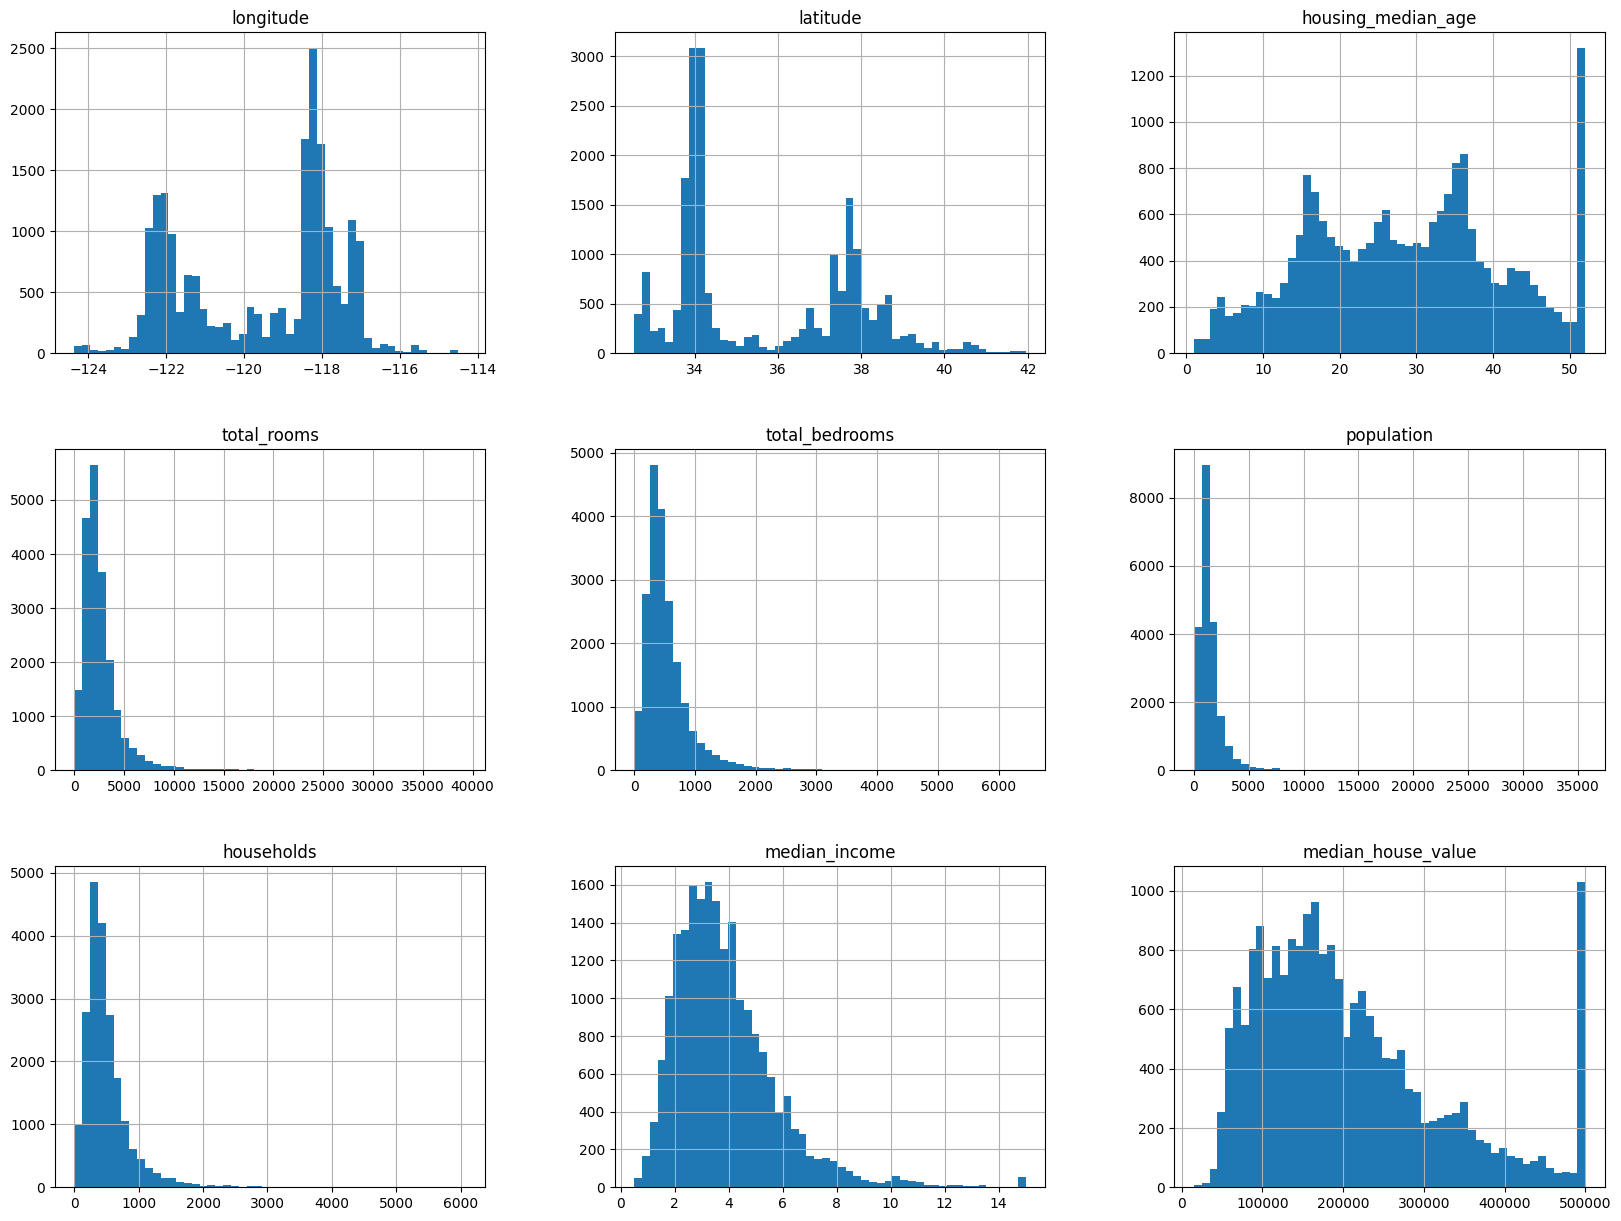

In [9]:
# histogram to further analyze data: in histogram, you may detect patterns, see how numerical values are formatted and detect caps 
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:


# categorize median income
# 0-1.5 = 1, 1.5-3 = 2 etc 
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)


from sklearn.model_selection import StratifiedShuffleSplit
# creating one test split, 0.2 testing data, sets fixed random seed, so split is always the same
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# splits training and testing while perserving category proportions 
for train_index, test_index in split.split(housing, housing["income_cat"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]


In [11]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)
# now test set and training set, are nearly identical in the way they categorize income

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [12]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)


income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [13]:
# put data in original state
for set_ in (strat_train_set, strat_test_set):
 set_.drop("income_cat", axis=1, inplace=True)


In [14]:
# create a copy of the training set to visuale without harming it
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

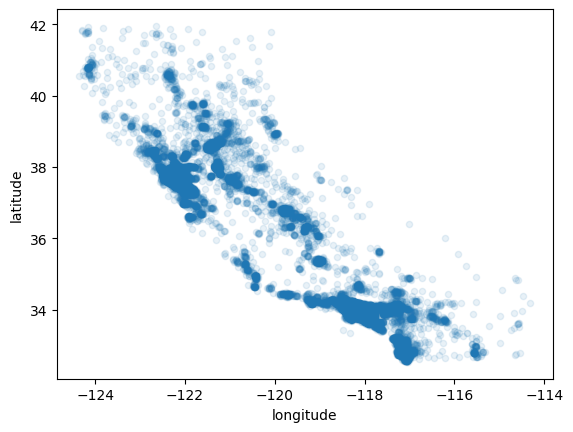

In [15]:
# create a scatter plot of the housing data
# by playing with the aplha, we can spot high desnisty areas 
housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.1)

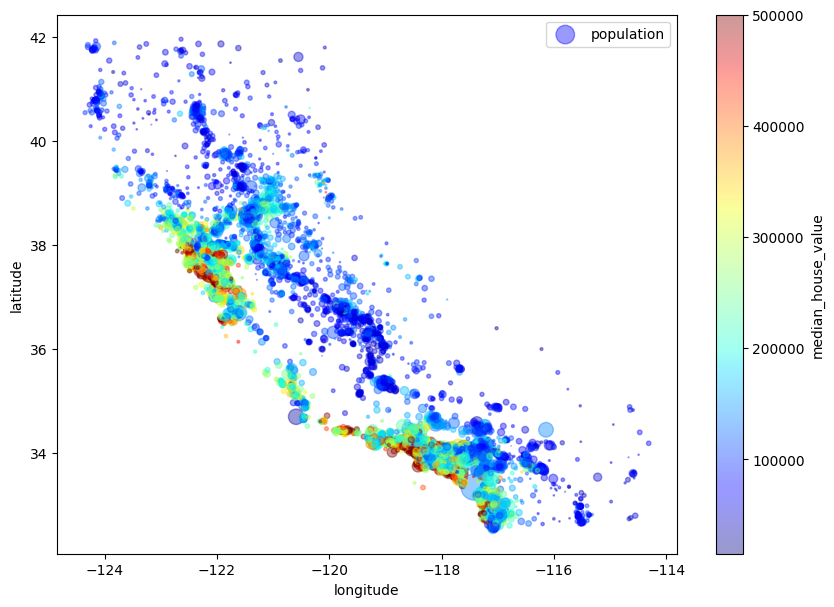

In [16]:
# create a colormap containing population of district, price, larger circles= higher population
# we can deduct that housing prices are very much related to the loaction, and as we go closer to the ocean we see more expensive houses
# detect main cluster with clustering algorithim
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [17]:

housing_num = housing.select_dtypes(include=[np.number])
# create a correlation matrix between every pair of attributes.
# close to 1 = strong positive correlation, close to -1 = strong negative correlation 
corr_matrix = housing_num.corr()


In [18]:

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

<Axes: xlabel='median_income', ylabel='median_house_value'>

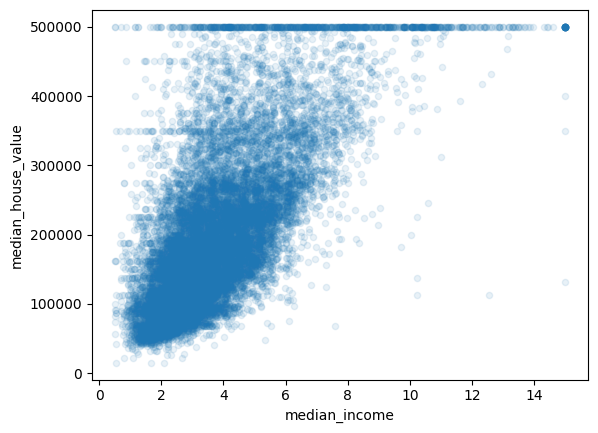

In [19]:
# create a scatterplot of the most important correlation 
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

In [20]:
# the dataset had some shitty data. Why would we need to know the number of bedrooms/rooms per district?
# we can easily create a bedrooms per house, rooms per house and bedrooms per room column 
# housing["bedrooms_per_household"] = housing["total_bedrooms"]/housing["households"]
# housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
# housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
# housing["population_per_household"]=housing["population"]/housing["households"]

import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

# custom transformer for comnbined attributes 

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        # Define indices (adjust if column order changes)
        self.rooms_ix = 3
        self.bedrooms_ix = 4
        self.population_ix = 5
        self.households_ix = 6
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, self.rooms_ix] / X[:, self.households_ix]
        population_per_household = X[:, self.population_ix] / X[:, self.households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, self.bedrooms_ix] / X[:, self.rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [21]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [22]:
housing_num = housing.select_dtypes(include=[np.number])
corr_matrix = housing_num.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [23]:
# revert to a clean training set by copying the training set
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
# sklearns impute method for handling missing values 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
# remember imputer only works on numerical columns. Not categorical 
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)


,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [24]:

X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [25]:
# convert categorical ocean proximity into numerical (ml algorithims prefer to work with numbers)
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:6]


array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.]])

In [26]:
# encoder groups numerical vaules to categories 1,2,3,4,5 maps to them
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [27]:
# onehot encoder is better encoding strategy, because ML model wont interpret them as ordered
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot 


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [28]:
# many data transformation steps need to be executed in the right order. Use scikits pipeline class to help 
"""this creates 3 new numerical columns. The ones we discussed before. 
        - rooms per 
        - population per
        - bedrooms per 
    along with 5 one hot encoded columns for categorical 
"""
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])

from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])
housing_prepared = full_pipeline.fit_transform(housing)


In [29]:
# now time to select and train a model.
# linear regression 
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [31]:
# prediictions are not the most accurate, lets calculate RMSE 
# when we calculate RMSE, we get a value of 68000, meaning our predictions are $68000 off on average
# housing prices range from 120-265k, so this is horrid 
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68627.87390018745)

In [32]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

In [ ]:
# validation set, because it looks like the desicion tree may have overfit the data
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
 scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)



In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

display_scores(tree_rmse_scores)
# now that we have added a validation set, we can see that the desicion trees don't perform as well as we thought they did. They perfrom even worse that the linear regression model 
# it is severly overfitting 


Scores: [70864.97196596 70344.36600819 69615.13375448 71574.1704079
 69062.2644728  77680.81225468 70346.03603439 72881.86011633
 69245.18743885 71822.94591522]
mean:  71343.77483688007
Standard Deviation:  2400.5738505042477


In [44]:
# try one last model: randomforestregressor 

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)
# Generate predictions from the Random Forest model
housing_predictions_forest = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions_forest)
forest_rmse = np.sqrt(forest_mse)

# Cross-validation for Random Forest
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

print("Training RMSE:", forest_rmse)
display_scores(forest_rmse_scores)


Training RMSE: 18650.698705770003
Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
mean:  50435.58092066179
Standard Deviation:  2203.3381412764606


In [48]:
import joblib 

joblib.dump(forest_reg, "forest_reg.pkl")
joblib.dump(tree_reg, "tree_reg.pkl")
joblib.dump(lin_reg, "lin_reg.pkl")



['lin_reg.pkl']

In [52]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

# Linear Regression predictions
print("Linear Regression Predictions:", lin_reg.predict(some_data_prepared))

# Decision Tree predictions
print("Decision Tree Predictions:", tree_reg.predict(some_data_prepared))

# Random Forest predictions
print("Random Forest Predictions:", forest_reg.predict(some_data_prepared))

print("\nActual Labels:", list(some_labels))

Linear Regression Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Decision Tree Predictions: [ 72100. 279600.  82700. 112500. 238300.]
Random Forest Predictions: [ 75324.   302650.01  82760.   123227.   228762.  ]

Actual Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [56]:
# fine tuning model: using grid search to find perfect hyperparameters 

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

# since we assume this method as the best model, we are finding the best combinaton of hypeparameters for it 
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

,estimator,RandomForestRegressor()
,param_grid,"[{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}, {'bootstrap': [False], 'max_features': [2, 3, ...], 'n_estimators': [3, 10]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,30


In [ ]:
# here we can see that max_features = 6 , and n_esitmatiors gives us our lowest rmse. 

# this gives us a 49998 rmse, which is much better than the random forest with default paramters 
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


64097.385273875894 {'max_features': 2, 'n_estimators': 3}
55327.29624318837 {'max_features': 2, 'n_estimators': 10}
52852.88303321225 {'max_features': 2, 'n_estimators': 30}
60355.65451819092 {'max_features': 4, 'n_estimators': 3}
52252.01859454049 {'max_features': 4, 'n_estimators': 10}
50326.604715691836 {'max_features': 4, 'n_estimators': 30}
58647.44927884275 {'max_features': 6, 'n_estimators': 3}
51813.32447708061 {'max_features': 6, 'n_estimators': 10}
50050.069890050516 {'max_features': 6, 'n_estimators': 30}
58955.67406027452 {'max_features': 8, 'n_estimators': 3}
52936.8973637639 {'max_features': 8, 'n_estimators': 10}
49988.991994566015 {'max_features': 8, 'n_estimators': 30}
61371.286137525625 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53942.795070702196 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59964.02010759528 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52269.90929413914 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [ ]:
 feature_importances = grid_search.best_estimator_.feature_importances_
